In [40]:
"""
Import bibliotek potrzebnych przy realizacji projektu
"""
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage

In [41]:
"""
Utworzenie klasy MORF zawierającej metody wykorzystywane przy realizacji zadania
"""


class MORF:
    """
    Konstrukotr klasy MORF, który przeprowadza konwersję obrazu do skali szarości oraz binaryzację obrazu wejściowego. Wyniki zapisywane są do pól obiektu danej klasy.
    """

    def __init__(self, srcImage):
        self.baseImage = srcImage
        self.grayImage = cv2.cvtColor(self.baseImage, cv2.COLOR_BGR2GRAY)
        (self.tmp_thresh, self.binImage) = cv2.threshold(self.grayImage, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    """
    Metoda przeprowadzająca operację otwarcia na wejściowym obrazie binarnym
    """

    def Open(self, srcImage):
        Operator = srcImage.copy()
        kernel = np.ones((24, 24), np.uint8)
        ErodedOperator = cv2.erode(Operator, kernel, iterations=1)
        OpenOperator = cv2.dilate(ErodedOperator, kernel, iterations=1)
        return OpenOperator

    """
    Metoda przeprowadzająca operację zamknięcia na wejściowym obrazie binarnym
    """

    def Close(self, srcImage):
        Operator = srcImage.copy()
        kernel = np.ones((24, 24), np.uint8)
        DilatedOperator = cv2.dilate(Operator, kernel, iterations=1)
        ClosedOperator = cv2.erode(DilatedOperator, kernel, iterations=1)
        return ClosedOperator

    """
    Metoda przeprowadzająca operację otwarcia właściwego na wejściowym obrazie binarnym
    """

    def OW(self, srcImage):
        return np.minimum(srcImage, self.Close(self.Open(self.Close(srcImage))))

    """
    Metoda przeprowadzająca operację zamknięcia właściwego na wejściowym obrazie binarnym
    """

    def ZW(self, srcImage):
        return np.maximum(srcImage, self.Open(self.Close(self.Open(srcImage))))

    """
    Metoda wyliczająca automedianę dla wejściowego obrazu binarnego
    """

    def Automediana(self, srcImage):
        return np.maximum(self.Open(self.Close(self.Open(srcImage))), self.OW(srcImage))

    """
    Metoda wyliczająca gradient morfologiczny dla wejściowego obrazu binarnego
    """

    def GradientMorfologiczny(self, srcImage):
        kernel = np.ones((3, 3), np.uint8)
        Dil = cv2.dilate(srcImage, kernel, iterations=1)
        Ero = cv2.erode(srcImage, kernel, iterations=1)
        Result = Dil - Ero
        return Result

    """
    Metoda wyliczająca dekompozycję wewnętrznego gradientu morfologicznego dla wejściowego obrazu binarnego
    """

    def GradWewn(self, srcImage):
        kernel = np.ones((3, 3), np.uint8)
        Ero = cv2.erode(srcImage, kernel, iterations=1)
        Result = srcImage - Ero
        return Result

    """
    Metoda wyliczająca dekompozycję zewnętrznego gradientu morfologicznego dla wejściowego obrazu binarnego
    """

    def GradZewn(self, srcImage):
        kernel = np.ones((3, 3), np.uint8)
        Dil = cv2.dilate(srcImage, kernel, iterations=1)
        Result = Dil - srcImage
        return Result

    """
    Metoda wyliczająca laplasjan morfologiczny dla wejściowego obrazu binarnego
    """

    def LaplasjanMorfologiczny(self, srcImage):
        GrZew = self.GradZewn(srcImage)
        GrWew = self.GradWewn(srcImage)
        Result = GrZew - GrWew
        return Result

    """
    Metoda realizująca filtrację Top-Hat (white top-hat) dla wejściowego obrazu binarnego
    """

    def Top_Hat_Filter(self, srcImage):
        OpenImg = self.Open(srcImage)
        Result = srcImage - OpenImg
        return Result

    """
    Metoda realizująca filtrację Bottom-Hat (black top-hat) dla wejściowego obrazu binarnego
    """

    def Bottom_Hat_Filter(self, srcImage):
        ClosedImg = self.Close(srcImage)
        Result = ClosedImg - srcImage
        return Result

    """Metoda realizująca szkieletyzację wejściowego obrazu binarnego"""

    def Skeletonize(self, srcImage):
        #Result = cv2.ximgproc.thinning(Image.BinImage, thinningType = cv2.ximgproc.THINNING_ZHANGSUEN)
        Result = skimage.morphology.skeletonize(srcImage, method='lee')
        return Result

    """Metoda obliczająca centroidy dla wejściowego obrazu binarnego"""

    def Centroid(self, srcImage):
        pass

    def convexHull(self):
        Result = self.baseImage.copy()
        contours, _ = cv2.findContours(self.binImage, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        for i in contours:
            hull = cv2.convexHull(i)
            cv2.drawContours(Result, [hull], -1, (0, 255, 255), 3)
        return Result

    def convexityDefects(self):
        Result = self.baseImage.copy()
        contours, hierarchy = cv2.findContours(self.binImage, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        for i in contours:
            hull = cv2.convexHull(i, returnPoints=False)
            defects = cv2.convexityDefects(i, hull)
            for j in range(defects.shape[0]):
                s,e,f,d = defects[j,0]
                start = tuple(i[s][0])
                end = tuple(i[e][0])
                far = tuple(i[f][0])
                cv2.line(Result,start,end,[0,255,0],2)
                cv2.circle(Result,far,5,[0,0,255],-1)
        return Result


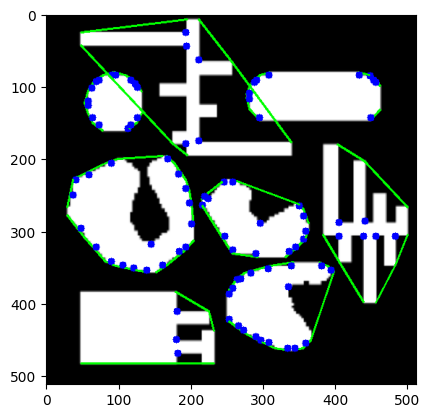

In [42]:
Image = MORF(cv2.imread("./Images/Wyklad_Img.bmp"))
#Image = MORF(cv2.imread("skeleton.bmp"))

#plt.imshow(Image.Bottom_Hat_Filter(Image.BinImage), cmap='gray', vmin=0, vmax=255)
#plt.imshow(Image.BinImage, cmap='gray', vmin=0, vmax=255)
#plt.figure()
#plt.imshow(Image.Skeletonize(Image.BinImage), cmap='gray', vmin=0, vmax=255)

plt.imshow(Image.convexityDefects())